In [72]:
from ete3 import Tree
import numpy as np 
import matplotlib.pyplot as plt

from simulate import simulate_shapes
from bridge_sampling.helper_functions import get_flat_values_sim


In [73]:
# load phylogeny 
tree = Tree('data/chazot_subtree.nw')
print(tree)
# load root shape for simulation 
root = np.genfromtxt('data/hercules_forewing_n=20.csv', delimiter=',')


      /-niepelti
   /-|
  |   \-theseus
--|
  |   /-hercules
   \-|
     |   /-amphitryon
      \-|
         \-telemachus


In [74]:
leafidx = []
inneridx = []
i = 0
for node in tree.traverse('levelorder'):
    if node.is_leaf():
        print(node.name)
        leafidx.append(i)
    else:
        inneridx.append(i)
    i+=1
print(leafidx)
print(inneridx)

niepelti
theseus
hercules
amphitryon
telemachus
[3, 4, 5, 7, 8]
[0, 1, 2, 6]


In [ ]:
ds = np.random.randint(0, 2**32)
simtree = simulate_shapes(ds=1, dt=0.1, sigma=0.5, alpha=0.05, root=root, tree=tree)
flat_true_tree = np.array(get_flat_values_sim(simtree)) 
#np.savetxt('comparison/flat_true_tree.csv', flat_true_tree, delimiter=",")

[[<matplotlib.lines.Line2D at 0x7fc0821bad50>],

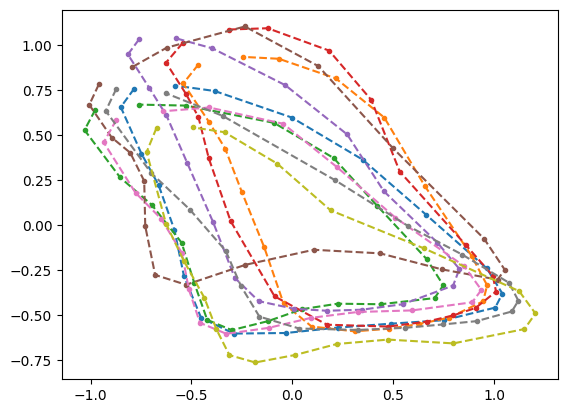

In [70]:
# visualize simulated data 
[plt.plot(flat_true_tree[idx][0::2], flat_true_tree[idx][1::2], '--o', markersize=3, label='Simulated data') for idx in range(flat_true_tree.shape[0])]

[[<matplotlib.lines.Line2D at 0x7fc08222dd10>],

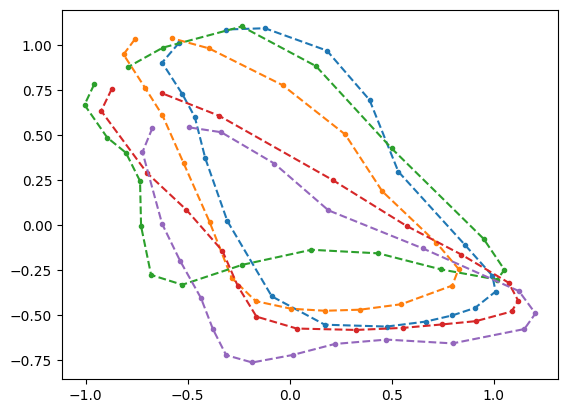

In [71]:
[plt.plot(flat_true_tree[idx][0::2], flat_true_tree[idx][1::2], '--o', markersize=3, label='Simulated data') for idx in leafidx]